In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.ndimage import filters
from math import pi

# load image

image shape :  (256, 256, 3)


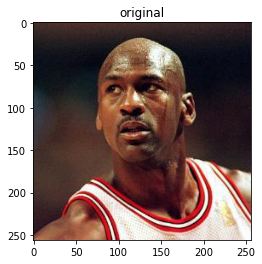

image shape :  (256, 256, 3)


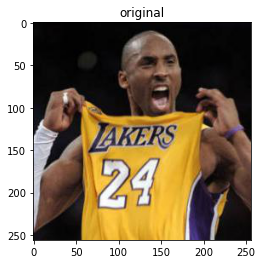

image shape :  (96, 96, 3)


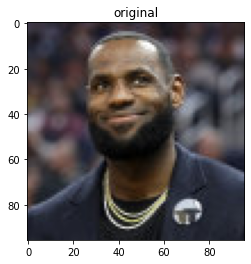

image shape :  (256, 256, 3)


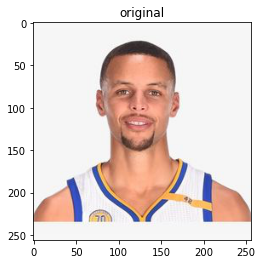

image shape :  (225, 225, 3)


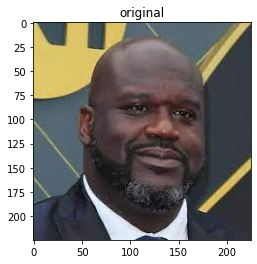

In [81]:
import numpy as np 
import matplotlib.pyplot as plt 

mj = plt.imread("person0.jpg")
kobe = plt.imread("person1.jpg") 
lbj  = plt.imread("person2.jpg") 
curry  = plt.imread("person3.jpg") 
shaq  = plt.imread("person4.jpg") 

print("image shape : ", mj.shape)
plt.imshow(mj)
plt.title('original') 
plt.show()

print("image shape : ", kobe.shape)
plt.imshow(kobe)
plt.title('original') 
plt.show()

print("image shape : ", lbj.shape)
plt.imshow(lbj)
plt.title('original') 
plt.show()

print("image shape : ", curry.shape)
plt.imshow(curry)
plt.title('original') 
plt.show()

print("image shape : ", shaq.shape)
plt.imshow(shaq)
plt.title('original') 
plt.show()

# print(kd.shape)
# plt.imshow(kd)
# plt.title('original') 
# plt.show()

# print(noise.shape)
# plt.imshow(noise)
# plt.title('original') 
# plt.show()

# rbg2gray

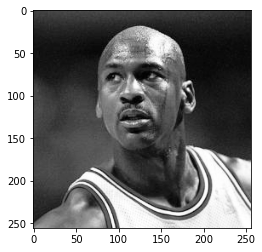

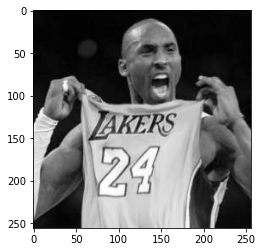

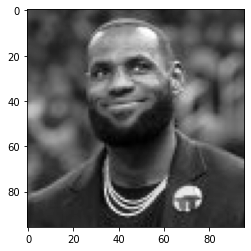

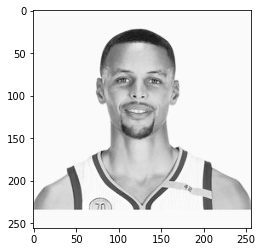

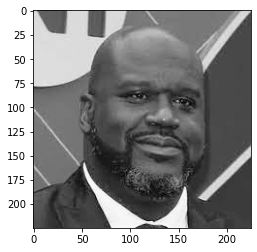

In [144]:
#  Y' = 0.299 R + 0.587 G + 0.114 B 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

mj_gray = rgb2gray(mj)  
plt.imshow(mj_gray, cmap='Greys_r')
plt.show()

kobe_gray = rgb2gray(kobe)  
plt.imshow(kobe_gray, cmap='Greys_r')
plt.show()

lbj_gray = rgb2gray(lbj)  
plt.imshow(lbj_gray, cmap='Greys_r')
plt.show()

curry_gray = rgb2gray(curry)  
plt.imshow(curry_gray, cmap='Greys_r')
plt.show()

shaq_gray = rgb2gray(shaq)  
plt.imshow(shaq_gray, cmap='Greys_r')
plt.show()



# Image Interpolation Methods : image enlargement

##### Nearest Neighbor


In [4]:
def NN_interpolation(a, n):
    '''
    n: enlarge times
    '''
    temp = np.zeros((a.shape[0] * n, a.shape[1] * n))
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i*n:i*n+n,j*n:j*n+n] = a[i][j]
    return temp

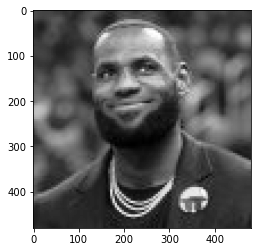

In [5]:
lbj_large = NN_interpolation(lbj_gray, 5)
plt.imshow(lbj_large, cmap='Greys_r')
plt.show()
# save images
plt.imsave('lbj_large.png', lbj_large, cmap='Greys_r')
plt.imsave('lbj_original.png', lbj_gray, cmap='Greys_r')

# Intensity Transformations: for contrast enhancement.

##### gamma correction(指數變換): s = c * r ** gamma

In [6]:
def gamma_correction(a, gamma):
    '''
    gamma:contrast enhancement
    '''
    c = 1  
    s = c * a ** gamma
    return s

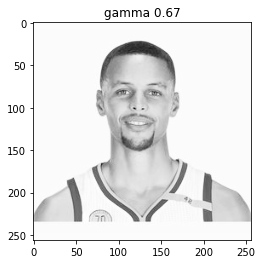

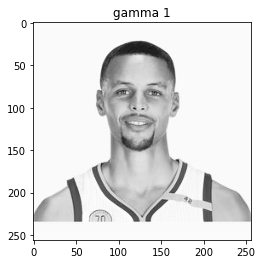

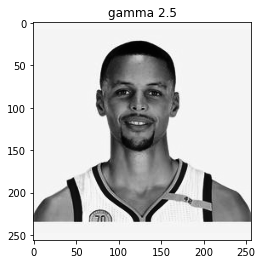

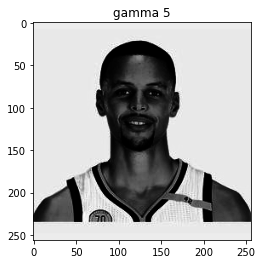

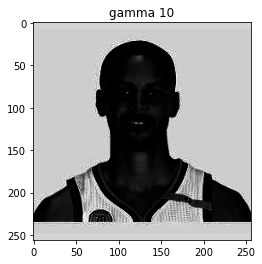

In [94]:
gammalist = [0.67, 1, 2.5, 5, 10]
for i, gamma in enumerate(gammalist):
    s = gamma_correction(curry_gray, gamma)
    plt.title('gamma {}'.format(gamma)) 
    plt.imshow(s, cmap='Greys_r')
    plt.show()

##### Histogram Equalization

In [105]:
def he(a, title_o, title_a):
    # plot origin histogram
    original = a.reshape(-1)
    plt.subplot(2,1,1) 
    plt.title(title_o) 
    plt.hist(original, bins=256)
    plt.show()
    
    
    # reference:https://codeinfo.space/imageprocessing/histogram-equalization/
    hist, bins = np.histogram(a.reshape(-1), bins=256, range=[0,255])
    pdf = hist/a.size                                  # pdf
    cdf = pdf.cumsum()                                 # cdf
    equ_value = np.around(cdf * 255).astype('uint8')   # round(cdf*255)
             
    img2int = np.around(a.reshape(-1)).astype(int)     # float to int
    
    temp = np.zeros(a.reshape(-1).shape[0])
    for i, pixel in enumerate(img2int):                
        temp[i] = equ_value[pixel]

    he = temp.reshape((a.shape[0], a.shape[1]))
    
    # plot histogram equalization
    plt.subplot(2,1,2) 
    plt.hist(temp, bins=256)
    plt.title(title_a)
    plt.show()
    
    return he

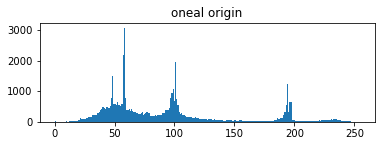

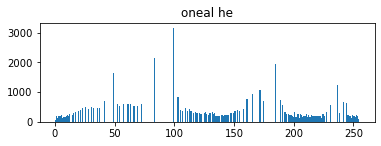

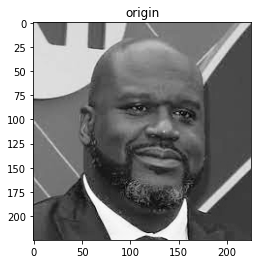

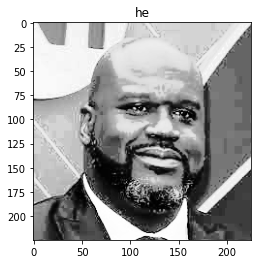

In [106]:
shaq_he = he(shaq_gray, "oneal origin", "oneal he")

# plot origin image
plt.imshow(shaq_gray, cmap='Greys_r')
plt.title("origin")
plt.show()

plt.imshow(shaq_he, cmap='Greys_r')
plt.title("he")
plt.show()

# Contrast Enhancement for Color Images

##### Method 1-1: Do it separately for the RGB channels by HE

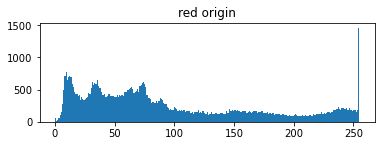

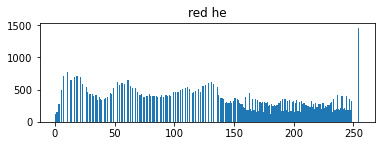

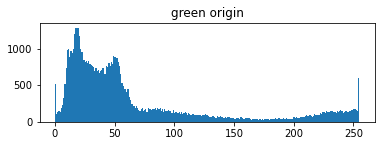

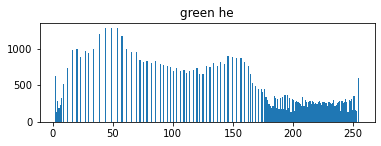

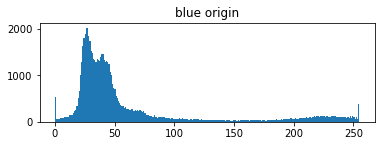

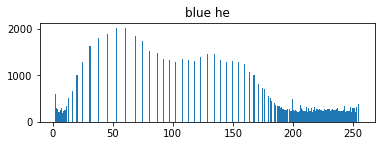

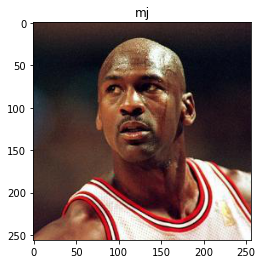

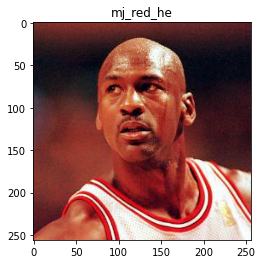

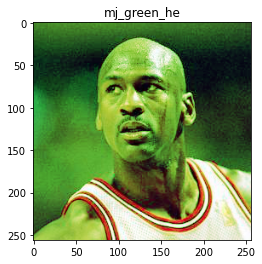

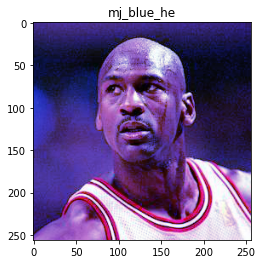

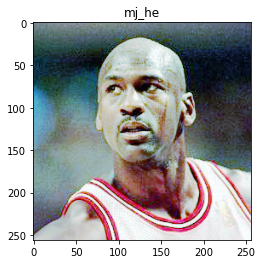

In [107]:
# enhance red
mj_red = mj[:,:,0]
mj_red_he_t = he(mj_red, "red origin", "red he")
mj_red_he = np.stack((mj_red_he_t, mj[:,:,1], mj[:,:,2]), axis=2).astype(int) 

# enhance green
mj_green = mj[:,:,1]
mj_green_he_t = he(mj_green, "green origin", "green he")
mj_green_he = np.stack((mj[:,:,0], mj_green_he_t, mj[:,:,2]), axis=2).astype(int) 

# enhance blue
mj_blue = mj[:,:,2]
mj_blue_he_t = he(mj_blue, "blue origin", "blue he")
mj_blue_he = np.stack((mj[:,:,0], mj[:,:,1], mj_blue_he_t), axis=2).astype(int) 

mj_he = np.stack((mj_red_he_t, mj_green_he_t, mj_blue_he_t), axis=2).astype(int) 

# origin
plt.imshow(mj)
plt.title("mj")
plt.show()
# enhance red
plt.imshow(mj_red_he)
plt.title("mj_red_he")
plt.show()
# enhance green
plt.imshow(mj_green_he)
plt.title("mj_green_he")
plt.show()
# enhance blue
plt.imshow(mj_blue_he)
plt.title("mj_blue_he")
plt.show()

plt.imshow(mj_he)
plt.title("mj_he")
plt.show()

##### Method 1-2: Do it separately for the RGB channels by gamma

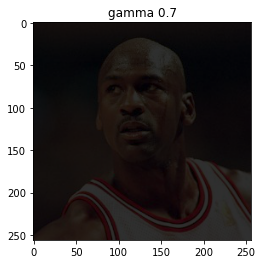

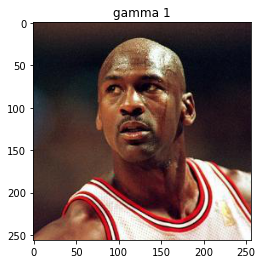

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


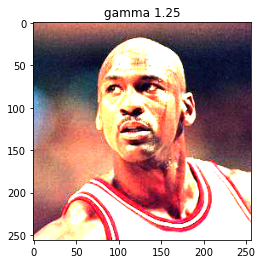

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


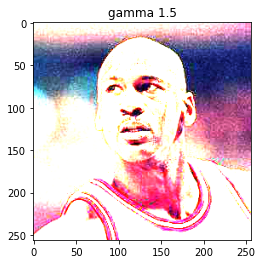

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


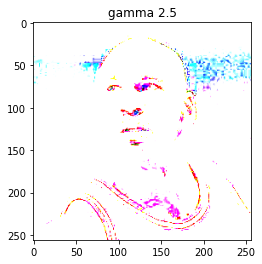

In [11]:
gammalist = [0.7, 1, 1.25, 1.5, 2.5]
for gamma in gammalist:
    mj_red_gamma   = gamma_correction(mj_red, gamma)
    mj_green_gamma = gamma_correction(mj_green, gamma)
    mj_blue_gamma  = gamma_correction(mj_blue, gamma)
    mj_gamma = np.stack((mj_red_gamma, mj_green_gamma, mj_blue_gamma), axis=2).astype(int) 

    plt.imshow(mj_gamma)
    plt.title("gamma {}".format(gamma))
    plt.show()

# Smoothing Filters: create a blurred version of the input image

##### box filter(average filter)

In [13]:
def box_filter(a, kernel):
    '''
    padding: padding size
    kernel: kernel size
    stride: stride
    '''
    padding = kernel//2
    kernel = kernel
    stride = 1   # same size of input and output 
    
    # create empty matrix
    temp = np.zeros((a.shape[0] + 2*padding, a.shape[1] + 2*padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding][j+padding] = a[i][j]

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.average(temp[stride*i:stride*i+kernel, 
                                         stride*j:stride*j+kernel])
       
    return blur

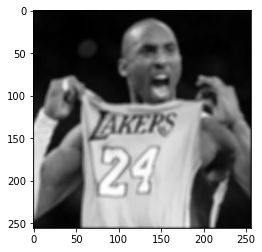

In [76]:
kobe_box = box_filter(kobe_gray, kernel=5)
plt.imshow(kobe_box, cmap='Greys_r')
plt.show()

##### Max and Min Filters

In [15]:
def min_filter(a, kernel):
    '''
    padding: padding size
    kernel: kernel size
    stride: stride
    '''
    padding = kernel//2
    kernel = kernel
    stride = 1   # same size of input and output
    
    # create empty matrix
    temp = np.zeros((a.shape[0] + 2*padding, a.shape[1] + 2*padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding][j+padding] = a[i][j]

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.min(temp[stride*i:stride*i+kernel, 
                                         stride*j:stride*j+kernel])
            
    return blur

def max_filter(a, kernel):
    '''
    padding: padding size
    kernel: kernel size
    stride: stride
    '''
    padding = kernel//2
    kernel = kernel
    stride = 1   # same size of input and output
    
    # create empty matrix
    temp = np.zeros((a.shape[0] + 2*padding, a.shape[1] + 2*padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding][j+padding] = a[i][j]

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.max(temp[stride*i:stride*i+kernel, 
                                         stride*j:stride*j+kernel])
            
    return blur

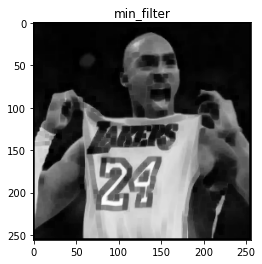

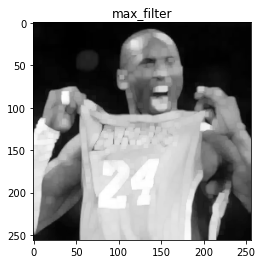

In [16]:
kobe_min = min_filter(kobe_gray, kernel=5)
plt.title("min_filter")
plt.imshow(kobe_min, cmap='Greys_r')
plt.show()

kobe_max = max_filter(kobe_gray, kernel=5)
plt.title("max_filter")
plt.imshow(kobe_max, cmap='Greys_r')
plt.show()

##### Median Filters

In [17]:
def median_filter(a, kernel):
    '''
    padding: padding size
    kernel: kernel size
    stride: stride
    '''
    padding = kernel//2
    kernel = kernel
    stride = 1   # same size of input and output
    
    # create empty matrix
    temp = np.zeros((a.shape[0] + 2*padding, a.shape[1] + 2*padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding][j+padding] = a[i][j]

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.median(temp[stride*i:stride*i+kernel, 
                                         stride*j:stride*j+kernel])
    return blur

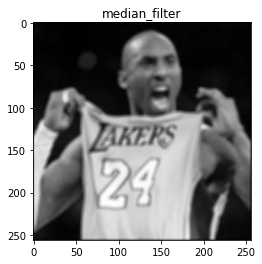

In [28]:
kobe_median = box_filter(kobe_gray, kernel=5)
plt.title("median_filter")
plt.imshow(kobe_median, cmap='Greys_r')
plt.show()

##### Gaussian Smoothing Filter 

In [73]:
def gaussian_filter(a, kernel, sigma):
    '''
    padding: padding size
    kernel: kernel size
    stride: stride
    sigma: smooth is control by σ，σ more bigger is more smooth and more blur
    '''
    padding = kernel//2
    kernel = kernel
    stride = 1   # same size of input and output
    
    # create empty matrix
    temp = np.zeros((a.shape[0] + 2*padding, a.shape[1] + 2*padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding][j+padding] = a[i][j]
    
    # gaussian kernel
    x, y = np.mgrid[-(kernel//2):(kernel//2)+1, -(kernel//2):(kernel//2)+1]
    gaussian_kernel = (1/(2*pi*sigma**2))*np.exp(-(x**2+y**2)/(2*(sigma**2)))

    # gaussian filter
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = (temp[stride*i:stride*i+kernel, stride*j:stride*j+kernel]@gaussian_kernel).sum()
            
    return blur

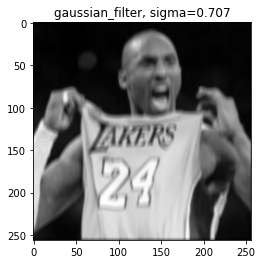

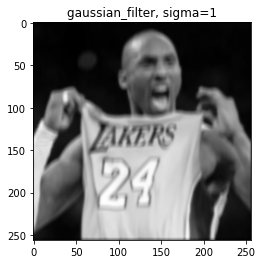

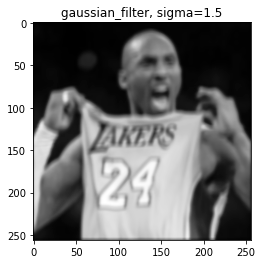

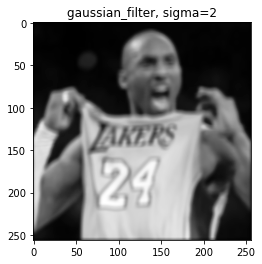

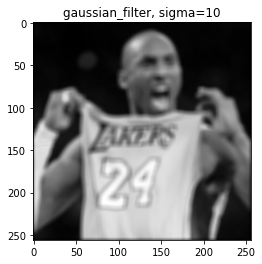

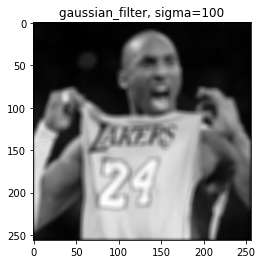

In [78]:
sigma_list = [0.707, 1, 1.5, 2, 10, 100] 
for sigma in sigma_list:
    kobe_gaussian = gaussian_filter(kobe_gray, kernel=7, sigma=sigma)  # sigma沒有差很多
    plt.title("gaussian_filter, sigma={}".format(sigma))
    plt.imshow(kobe_gaussian, cmap='Greys_r')
    plt.show()

##### Laplacian Filter

In [140]:
def laplacian_filter(a, kernel=3):
    '''
    padding: padding size
    kernel: kernel size
    stride: stride
    '''
    padding = kernel//2
    kernel = kernel
    stride = 1   # same size of input and output
    
    # create empty matrix
    temp = np.zeros((a.shape[0] + 2*padding, a.shape[1] + 2*padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding][j+padding] = a[i][j]
    
    # laplacian kernel
    laplacian_kernel = np.array([[0,1,0],
                                 [1,-4,1],
                                 [0,1,0]])
    
    # laplacian filter
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = (temp[stride*i:stride*i+kernel, stride*j:stride*j+kernel]@laplacian_kernel).sum()

            
    return blur

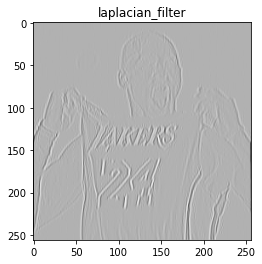

In [141]:
kobe_laplacian = laplacian_filter(kobe_gray, kernel=3)
plt.title("laplacian_filter")
plt.imshow(kobe_laplacian, cmap='Greys_r')
plt.show()

# result

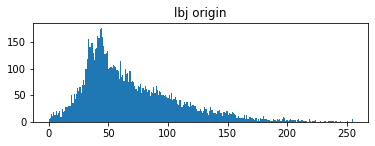

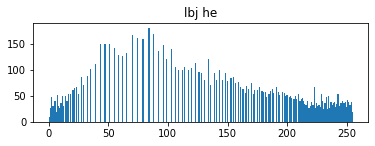

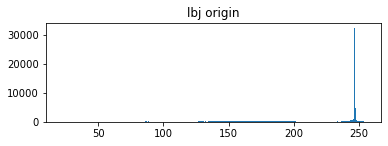

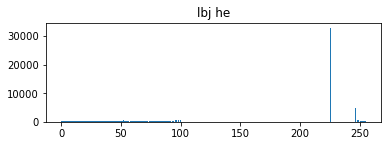

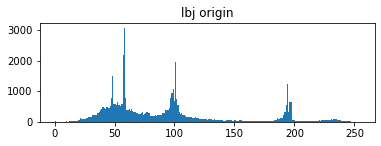

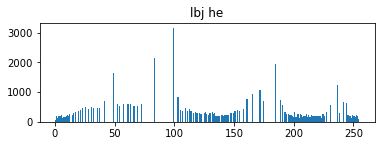

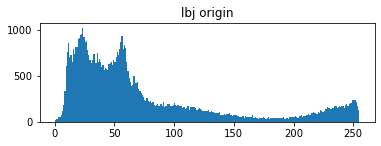

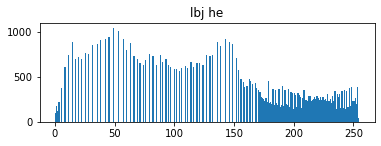

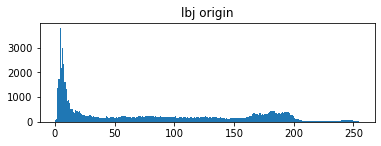

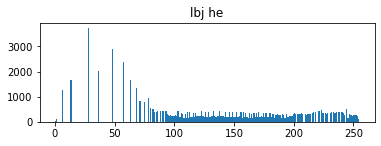

In [124]:
lbj_he = he(lbj_gray, "lbj origin", "lbj he")
curry_he = he(curry_gray, "lbj origin", "lbj he")
shaq_he = he(shaq_gray, "lbj origin", "lbj he")
mj_he = he(mj_gray, "lbj origin", "lbj he")
kobe_he = he(kobe_gray, "lbj origin", "lbj he")

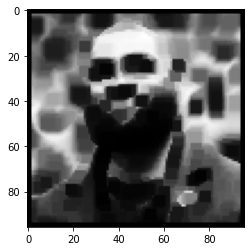

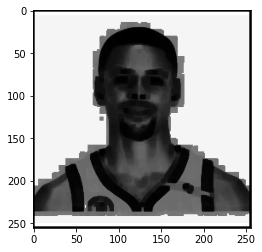

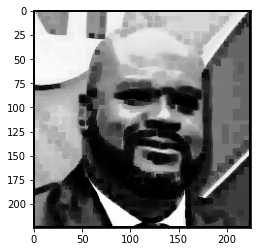

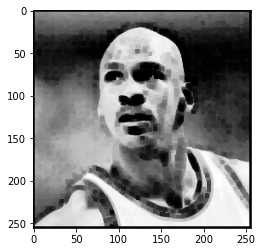

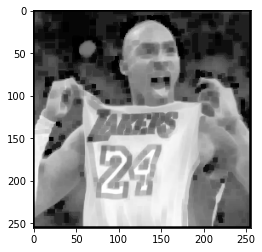

In [143]:
people = [lbj_he, curry_he, shaq_he, mj_he, kobe_he]
for p in people:
    people_he_min = min_filter(p, kernel=5)
    plt.imshow(people_he_min, cmap='Greys_r')
    plt.show()